# Automatic Detection of Hot-Rolled Steel Strips Surface Defects using Convolutional Neural Network
#### This project aims to automatically detect surface defects in Hot-Rolled Steel Strips such as rolled-in scale, patches, crazing, pitted surface, inclusion and scratches (as depicted in the image below). A Convolutional Neural Network Model is developed and trained on the NEU Metal Surface Defects Database which contains 1800 grayscale images with 300 samples of each of the six different kinds of surface defects.

## 1. Importing Relevant Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img

## 2. Importing the NEU Metal Surface Defect Dataset

In [38]:
train_dir = '/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train'
val_dir = '/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/valid'
test_dir='/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test'
print("Path: ",os.listdir("/neu-metal-surface-defects-data/NEU Metal Surface Defects Data"))
print("Train: ",os.listdir("/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/train"))
print("Test: ",os.listdir("/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/test"))
print("Validation: ",os.listdir("/neu-metal-surface-defects-data/NEU Metal Surface Defects Data/valid"))

Path:  ['valid', 'Thumbs.db', 'test', 'train']
Train:  ['Crazing', 'Rolled', 'Pitted', 'Patches', 'Inclusion', 'Scratches']
Test:  ['Crazing', 'Rolled', 'Pitted', 'Patches', 'Inclusion', 'Scratches']
Validation:  ['Crazing', 'Rolled', 'Pitted', 'Patches', 'Inclusion', 'Scratches']


#### For each Class, the Training Data includes 276 Images, Validation & Test sets have 12 images each.

In [41]:
print("Inclusion Defect")
print("Training Images:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Images:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Images:",len(os.listdir(val_dir+'/'+'Inclusion')))

Inclusion Defect
Training Images: 276
Testing Images: 12
Validation Images: 12


## 3. Data Pre-processing

In [4]:
# Rescaling all Images by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training images are put in batches of 10
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Validation images are put in batches of 10
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


#### Setting upper Limit of Max 98% training accuracy

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

## 4. Defining the CNN Architecture

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 98, 98, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 128)       32896     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)            

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

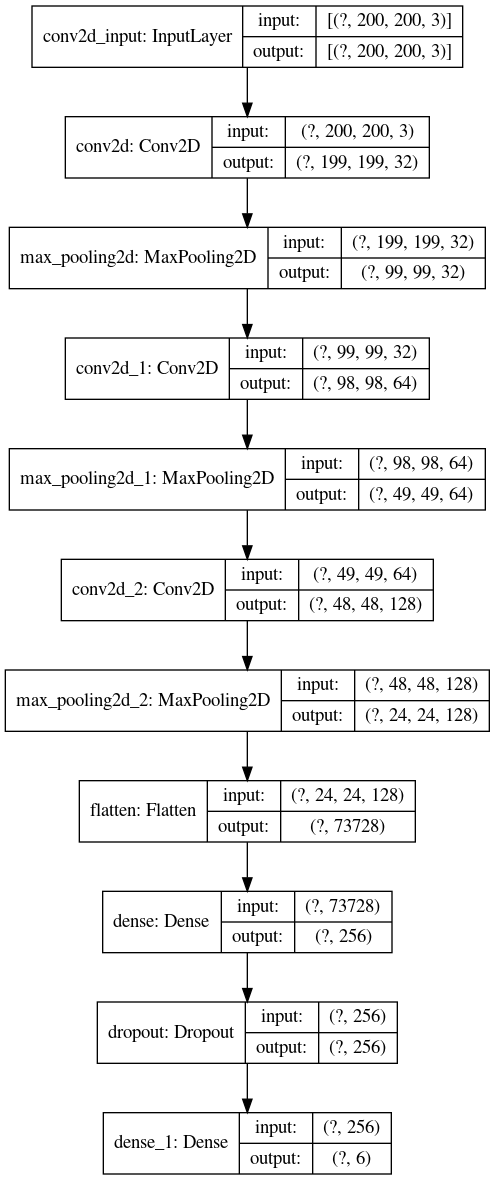

In [17]:
tf.keras.utils.plot_model(
    model,
    to_file='cnn_architecture.png',
    show_shapes=True)

## 5. Training the Defined CNN Model

In [8]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20
166/166 [==============================] - 25s 153ms/step - loss: 1.8284 - accuracy: 0.3037 - val_loss: 1.1721 - val_accuracy: 0.4028
Epoch 2/20
166/166 [==============================] - 21s 124ms/step - loss: 1.1635 - accuracy: 0.5773 - val_loss: 1.0161 - val_accuracy: 0.5556
Epoch 3/20
166/166 [==============================] - 19s 113ms/step - loss: 0.8251 - accuracy: 0.7246 - val_loss: 0.7933 - val_accuracy: 0.7083
Epoch 4/20
166/166 [==============================] - 19s 115ms/step - loss: 0.6474 - accuracy: 0.7923 - val_loss: 0.5164 - val_accuracy: 0.8194
Epoch 5/20
166/166 [==============================] - 20s 120ms/step - loss: 0.5577 - accuracy: 0.8164 - val_loss: 0.4213 - val_accuracy: 0.8889
Epoch 6/20
166/166 [==============================] - 18s 108ms/step - loss: 0.4506 - accuracy: 0.8575 - val_loss: 0.3802 - val_accuracy: 0.8889
Epoch 7/20
166/166 [==============================] - 19s 114ms/step - loss: 0.4861 - accuracy: 0.8545 - val_loss: 0.1746 - val_ac

## 6. Analysing the Accuracy & the Loss Curves

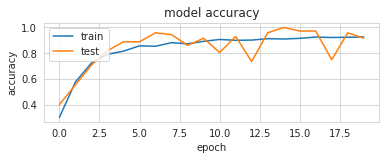

In [34]:
sns.set_style("whitegrid")
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

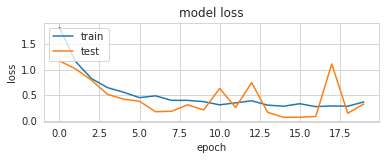

In [30]:
sns.set_style("whitegrid")
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

## 7. Test Result visualization

In [11]:
# Loading file names & their respective target labels into numpy array
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
x_test, y_test,target_labels = load_dataset(test_dir)
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [12]:
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [13]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [14]:
x_test = x_test.astype('float32')/255

## Results of Hot-Rolled Steel Strips Surface Defect Detection

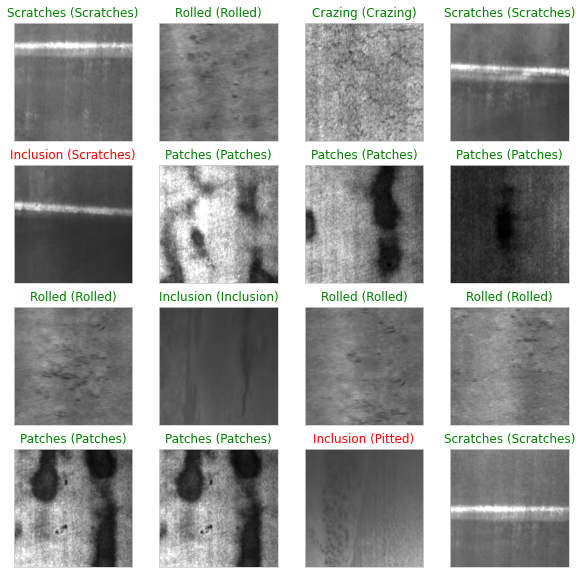

In [37]:
# Plotting Random Sample of test images, their predicted labels, and ground truth
y_pred = model.predict(x_test)
fig = plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))